## 读写文本格式的数据

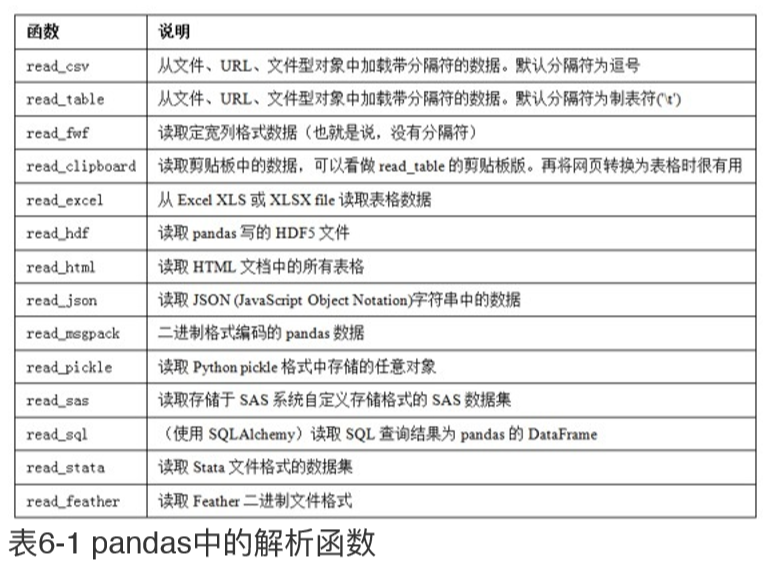

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [4]:
df = pd.read_csv('examples/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [6]:
pd.read_table('examples/ex1.csv', sep=',')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [7]:
pd.read_csv('examples/ex2.csv', header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [8]:
pd.read_csv('examples/ex2.csv', names=['a', 'b' ,'c', 'd'])

,a,b,c,d
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [9]:
names = ['a', 'b', 'c', 'd', 'message']
pd.read_csv('examples/ex2.csv', names=names, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


如果希望将多个列做成⼀个层次化索引，只需传⼊由列编号或列 名组成的列表即可

In [11]:
parsed = pd.read_csv('examples/csv_mindex.csv',
                     index_col=['key1', 'key2'])
parsed

value1  value2 
key1 key2                 
one  a          1        2
     b          3        4
     c          5        6
     d          7        8
two  a          9       10
     b         11       12
     c         13       14
     d         15       16

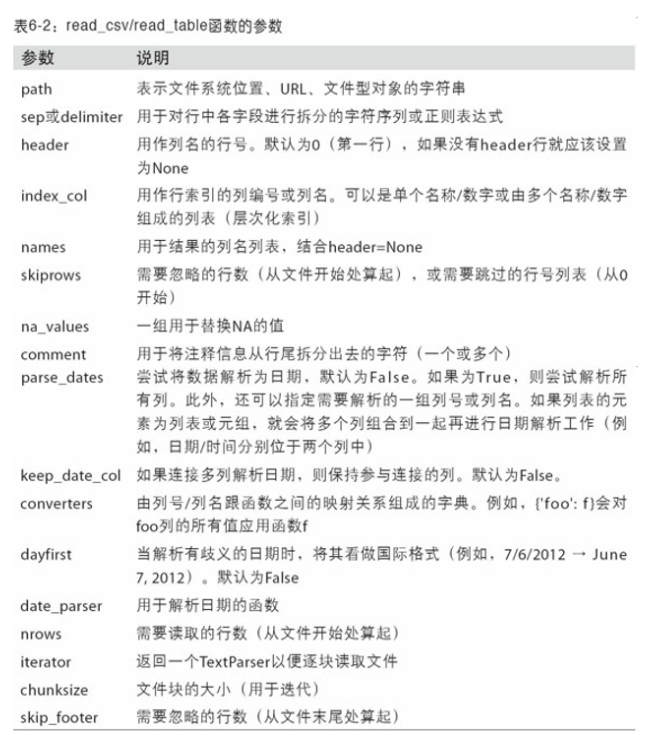

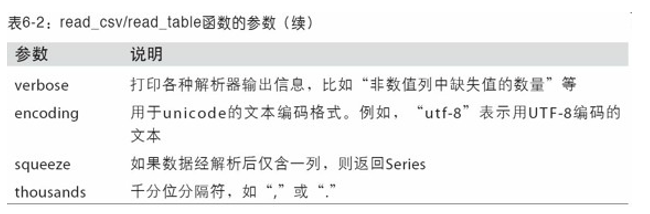

### 逐块读取文本文件

In [12]:
pd.options.display.max_rows = 10

In [13]:
result = pd.read_csv('examples/ex6.csv')
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [14]:
pd.read_csv('examples/ex6.csv', nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


要逐块读取⽂件，可以指定chunksize（⾏数）：

In [15]:
chunker = pd.read_csv('examples/ex6.csv', chunksize=1000)
chunker

In [16]:
chunker = pd.read_csv('examples/ex6.csv', chunksize=1000)

tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(),fill_value=0)

tot = tot.sort_values(ascending=False)

In [17]:
tot[:10]

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64

### 将数据写出到文本格式

In [18]:
data = pd.read_csv('examples/ex5.csv')
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [19]:
data.to_csv('examples/out.csv')

In [20]:
import sys

data.to_csv(sys.stdout, sep='|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [21]:
data.to_csv(sys.stdout, na_rep='NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [22]:
data.to_csv(sys.stdout, index=False, header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [23]:
data.to_csv(sys.stdout, index=False, columns=['a' ,'b', 'c'])

a,b,c
1,2,3.0
5,6,
9,10,11.0


In [25]:
dates = pd.date_range('1/1/2000', periods=7)
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07'],
              dtype='datetime64[ns]', freq='D')

In [26]:
ts = pd.Series(np.arange(7), index=dates)
ts

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
2000-01-06    5
2000-01-07    6
Freq: D, dtype: int32

In [27]:
ts.to_csv('examples/tseries.csv')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


### 处理分隔符格式

In [1]:
import csv
f = open('examples/ex7.csv')

reader = csv.reader(f)

对这个reader进⾏迭代将会为每⾏产⽣⼀个元组（并移除了所有 的引号）：

In [2]:
for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


In [3]:
with open('examples/ex7.csv') as f:
    lines = list(csv.reader(f))

In [4]:
header, values = lines[0], lines[1:]

In [5]:
lines

[['a', 'b', 'c'], ['1', '2', '3'], ['1', '2', '3']]

In [6]:
data_dict = {h: v for h, v in zip(header, zip(values[0], values[1]))}
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

CSV⽂件的形式有很多。只需定义csv.Dialect的⼀个⼦类即可定 义出新格式（如专⻔的分隔符、字符串引⽤约定、⾏结束符等）

class my_dialect(csv.Dialect):
    lineterminator = '\n'
    delimiter = ';'
    quotechar = '"'
    quating = csv.QUOTE_MINIMAL
reader = csv.reader(f, dialect=my_dialect)

reader = csv.reader(f, delimiter='|')

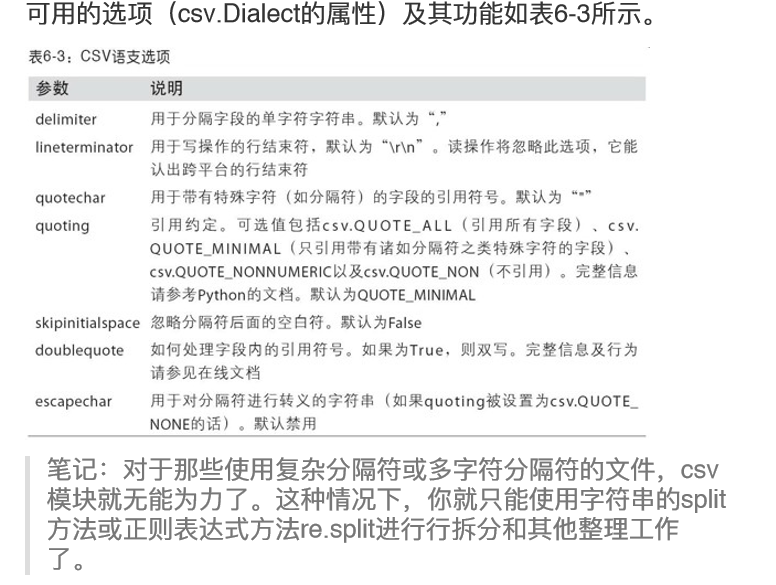

with open('mydata.csv', 'w') as f: writer = csv.writer(f, dialect=my_dialect) writer.writerow(('one', 'two', 'three')) writer.writerow(('1', '2', '3')) writer.writerow(('4', '5', '6')) writer.writerow(('7', '8', '9'))

### JSON数据

In [10]:
obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
              {"name": "Katie", "age": 38,
               "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

In [11]:
import json

In [12]:
result = json.loads(obj)

In [13]:
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [14]:
asjson = json.dumps(result)

In [16]:
import pandas as pd
siblings = pd.DataFrame(result['siblings'], columns=['name', 'age'])
siblings

,name,age
0,Scott,30
1,Katie,38


In [17]:
#!cat examples/example.json

'cat' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


pandas.read_json 可以自动将特别格式的JSON 数据集转化为Series或DataFrame

In [19]:
data = pd.read_json('examples/example.json')
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [20]:
print(data.to_json())

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}


In [21]:
print(data.to_json(orient='records'))

[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


### XML和HTML：Web信息收集

## 二进制数据格式

格式保存到磁盘上的to_pickle⽅法实现数据的⾼效⼆进制格式存储最简单的办法之⼀是使⽤Python 内置的pickle序列化。pandas对象都有⼀个⽤于将数据以pickle


In [22]:
frame = pd.read_csv('examples/ex1.csv')
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [23]:
frame.to_pickle('examples/frame_pickle')

In [24]:
pd.read_pickle('examples/frame_pickle')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### 使用HDF5格式

In [26]:
frame = pd.DataFrame({'a': np.random.randn(100)})
store = pd.HDFStore('mydata.h5')

In [28]:
store['obj1'] = frame

In [31]:
store['obj1_col'] = frame['a']

In [32]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: mydata.h5

In [33]:
store['obj1']

,a
0,0.883729
1,-1.084427
2,0.167866
3,-1.455159
4,0.171018
5,-0.099903
6,0.203122
7,-0.153306
8,0.253953
9,0.632143


In [34]:
store['obj1_col'] 

0     0.883729
1    -1.084427
2     0.167866
3    -1.455159
4     0.171018
5    -0.099903
6     0.203122
7    -0.153306
8     0.253953
9     0.632143
10   -1.194418
11   -1.311109
12    0.474442
13    0.420663
14    0.932408
15   -0.390028
16   -0.291174
17    1.005571
18    0.822591
19   -2.605545
20   -0.840736
21   -0.505108
22    1.421158
23    0.102628
24   -0.996578
25   -0.735609
26    0.556212
27    0.972007
28   -1.044919
29   -0.183119
        ...   
70    0.820900
71   -0.665075
72   -2.137841
73    0.248459
74   -0.674005
75   -0.886347
76   -0.741391
77   -0.918728
78    1.712195
79   -0.420103
80   -1.649849
81   -0.760250
82    0.606350
83   -0.989065
84    1.922324
85    0.554918
86    0.956262
87    0.973809
88   -2.117786
89   -0.498430
90   -1.094813
91   -0.104893
92   -0.415978
93   -0.632984
94    0.317122
95   -0.914061
96    0.428071
97   -0.100641
98   -0.805564
99   -0.801640
Name: a, Length: 100, dtype: float64

In [35]:
store.put('obj2', frame, format='table')

In [36]:
store.select('obj2', where=['index >= 10 and index <= 15'])

,a
10,-1.194418
11,-1.311109
12,0.474442
13,0.420663
14,0.932408
15,-0.390028


In [37]:
store.close()

In [38]:
frame.to_hdf('mydata.h5', 'obj3', format='table')
pd.read_hdf('mydata.h5', 'obj3', where=['index < 5'])

,a
0,0.883729
1,-1.084427
2,0.167866
3,-1.455159
4,0.171018


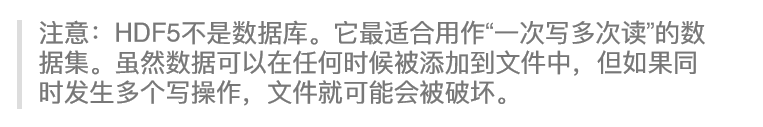

### 读取Microsoft Excel文件

In [39]:
xlsx = pd.ExcelFile('examples/ex1.xlsx')

In [41]:
pd.read_excel(xlsx, 'Sheet1')

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [42]:
frame = pd.read_excel('examples/ex1.xlsx', 'Sheet1')
frame

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [43]:
writer = pd.ExcelWriter('examples/ex2.xlsx')
frame.to_excel(writer, 'Sheet1')
writer.save()

In [44]:
frame.to_excel('examples/ex2.xlsx')

## Web APIs交互

In [46]:
import requests

In [48]:
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
resp

<Response [200]>

In [49]:
data = resp.json()

In [51]:
data[0]['title']

'BUG: df.rename raises when multiindex has duplicates'

In [52]:
issues = pd.DataFrame(data, columns=['number', 'title',
                                     'labels', 'state'])
issues

,number,title,labels,state
0,38015,BUG: df.rename raises when multiindex has dupl...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
1,38014,BUG: Fixes plotting with nullable integers (#3...,[],open
2,38013,BUG: pandas truncate too large data without an...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
3,38012,REF: Implement isin on DTA instead of DTI,[],open
4,38011,TST/REF: collect Index.equals tests,[],open
5,38010,BUG: loc returning wrong elements for non-mono...,[],open
6,38009,CLN: fix E741 ambiguous variable #34150,[],open
7,38008,REF: define DTA._infer_matches,[],open
8,38007,Arrow backed string array - implement factoriz...,"[{'id': 849023693, 'node_id': 'MDU6TGFiZWw4NDk...",open
9,38006,TST/REF: collect tests from test_multilevel,[],open


## 数据库交互

In [53]:
import sqlite3

In [54]:
query = """
    create table test
    (a varchar(20), b varchar(20),
    c real, d integer
    );
"""

In [56]:
con = sqlite3.connect('mydata.sqlite')
con.execute(query)

In [57]:
con.commit()

In [58]:
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ('Sacramento', 'California', 1.7, 5)]
stmt = "insert into test values(?, ?, ?, ?)"
con.executemany(stmt, data)

In [59]:
cursor = con.execute('select * from test')
rows = cursor.fetchall()


In [60]:
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [61]:
cursor.description

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None))

In [63]:
import sqlalchemy as sqla

In [62]:
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [64]:
db = sqla.create_engine('sqlite:///mydata.sqlite')

In [66]:
pd.read_sql('select * from test', db)

,a,b,c,d
